In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")
#How to give sheet name
#train_data = pd.read_excel(r"Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)
#Use of display.max_columns
#The display.max_columns option controls the number of columns to be printed. It receives an int or None (to print all the columns)


In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
pd.set_option('max_columns', 7)
train_data.head()

,Airline,Date_of_Journey,Source,...,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,...,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,...,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,...,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,...,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,...,1 stop,No info,13302


In [6]:
#We use github to store code.It is just a repository
train_data.info()
#.info() is used to check what datatype it has.
#It has object datatype.Object datatype means string
#From Airline to Additional_info all are strings,Price is only integer.Price is dependent feature 
#rest all features are independent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [7]:
train_data["Duration"].value_counts()
#with value_counts how many unique values are there can be found out.
# 550 records have duration of 2h 50min 

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
3h 25m       1
28h 30m      1
42h 45m      1
4h 10m       1
29h 10m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.shape

(10683, 11)

In [9]:
train_data.dropna(inplace = True)
#We are dropping the nan values by above line of code
#Once we are able to drop the null values,after that we can do further process

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
##EDA
#From description we can see that Date_of_Journey is a object data type
#Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

#For this we require pandas to_datetime to convert object data type to datetime dtype.

#**.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [12]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
#with above we can actually find on which day the person has actually travelled
#Model will not be able to understand strings and so first the date is converted to datetime
#and then we have got date and month for each date respectively
#Since the data is only of one year so we do not need to extract the year

In [13]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
#with above we can actually find on which month the person has actually travelled or we will get the day data for each person
#Why we need to convert dates to datetime object

In [14]:
train_data.head()
#Two new features journey_day and journey_month are created

,Airline,Date_of_Journey,Source,...,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,...,3897,24,3
1,Air India,1/05/2019,Kolkata,...,7662,1,5
2,Jet Airways,9/06/2019,Delhi,...,13882,9,6
3,IndiGo,12/05/2019,Kolkata,...,6218,12,5
4,IndiGo,01/03/2019,Banglore,...,13302,1,3


In [15]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [16]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)
#axis =1 means column wise,whichever column names it will match,it will drop that column

In [17]:
train_data.head()

,Airline,Source,Destination,...,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,...,3,22,20
1,Air India,Kolkata,Banglore,...,5,5,50
2,Jet Airways,Delhi,Cochin,...,6,9,25
3,IndiGo,Kolkata,Banglore,...,5,18,5
4,IndiGo,Banglore,New Delhi,...,3,16,50


In [18]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [19]:
train_data.head()

,Airline,Source,Destination,...,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,...,20,1,10
1,Air India,Kolkata,Banglore,...,50,13,15
2,Jet Airways,Delhi,Cochin,...,25,4,25
3,IndiGo,Kolkata,Banglore,...,5,23,30
4,IndiGo,Banglore,New Delhi,...,50,21,35


In [20]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
#Use of above code

In [21]:
"2h 50m".split()

['2h', '50m']

In [22]:
len("2h 50m".split())

2

In [23]:
len("19h".split())

1

In [24]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [25]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [26]:
train_data.head()

,Airline,Source,Destination,...,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,...,10,2,50
1,Air India,Kolkata,Banglore,...,15,7,25
2,Jet Airways,Delhi,Cochin,...,25,19,0
3,IndiGo,Kolkata,Banglore,...,30,5,25
4,IndiGo,Banglore,New Delhi,...,35,4,45


In [27]:
#Handling Categorical Data
#One can find many ways to handle categorical data. Some of them categorical data are,

#**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
#**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [28]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

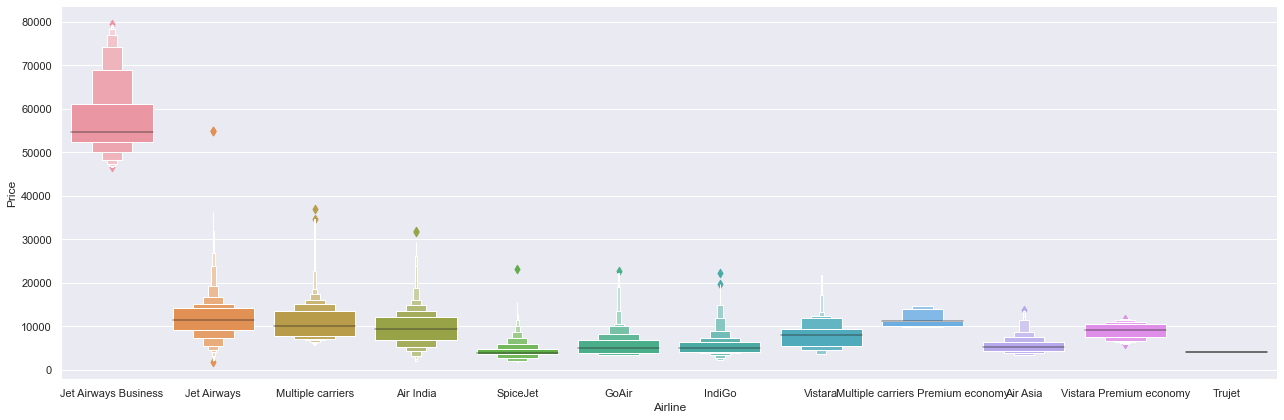

In [29]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()
#with respect to the different categories of airline,prices of respective airlines are plotted in descending order

In [30]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()
#use of drop_first

,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,...,0,0,0
1,1,0,0,...,0,0,0
2,0,0,0,...,0,0,0
3,0,0,1,...,0,0,0
4,0,0,1,...,0,0,0


In [31]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

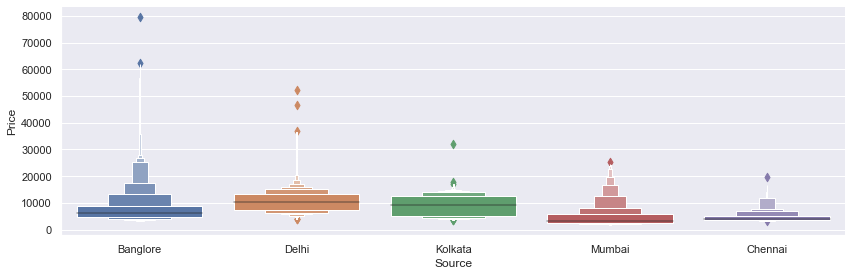

In [32]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()
#Banglore and Delhi has some outliers

In [33]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [35]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [37]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [38]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [40]:
train_data.head()
#As no. of stops increases,price of airline increases

,Airline,Source,Destination,...,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,...,10,2,50
1,Air India,Kolkata,Banglore,...,15,7,25
2,Jet Airways,Delhi,Cochin,...,25,19,0
3,IndiGo,Kolkata,Banglore,...,30,5,25
4,IndiGo,Banglore,New Delhi,...,35,4,45


In [41]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [42]:
data_train.head()

,Airline,Source,Destination,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,...,0,0,1
1,Air India,Kolkata,Banglore,...,0,0,0
2,Jet Airways,Delhi,Cochin,...,0,0,0
3,IndiGo,Kolkata,Banglore,...,0,0,0
4,IndiGo,Banglore,New Delhi,...,0,0,1


In [43]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [44]:
data_train.head()

,Total_Stops,Price,Journey_day,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,...,0,0,1
1,2,7662,1,...,0,0,0
2,2,13882,9,...,0,0,0
3,1,6218,12,...,0,0,0
4,1,13302,1,...,0,0,1


In [45]:
data_train.shape

(10682, 30)

In [46]:
#Could we not combine train and test data together and then do the preprocessing steps together
#Why we have to do preprocessing steps for train an test data separately
#Because of data leakage we dont do like that.Model may get to see some test data so to avoid data leakage 
#We do preprocessing steps for train and test data separately

#Data leakage can cause overfitting of ML model

In [47]:
test_data = pd.read_excel("Test_set.xlsx")

In [48]:
test_data.head()

,Airline,Date_of_Journey,Source,...,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,...,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,...,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,...,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,...,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,...,2h 50m,non-stop,No info


In [49]:
# Preprocessing
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 104.4+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [50]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,...,Hyderabad,Kolkata,New Delhi
0,1,6,6,...,0,0,0
1,1,12,5,...,0,0,0
2,1,21,5,...,0,0,0
3,1,21,5,...,0,0,0
4,0,24,6,...,0,0,0


In [51]:
#Feature Selection
#Finding out the best feature which will contribute and have good relation with target variable. 
#Following are some of the feature selection methods,

#**heatmap**
#**feature_importance_**
#**SelectKBest**

In [52]:
data_train.shape

(10682, 30)

In [53]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [54]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()
#My dependent feature i.e. price is not there in X

,Total_Stops,Journey_day,Journey_month,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,...,0,0,1
1,2,1,5,...,0,0,0
2,2,9,6,...,0,0,0
3,1,12,5,...,0,0,0
4,1,1,3,...,0,0,1


In [55]:
y = data_train.iloc[:, 1]
y.head()
#y is having dependent feature
#imp. line of code

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

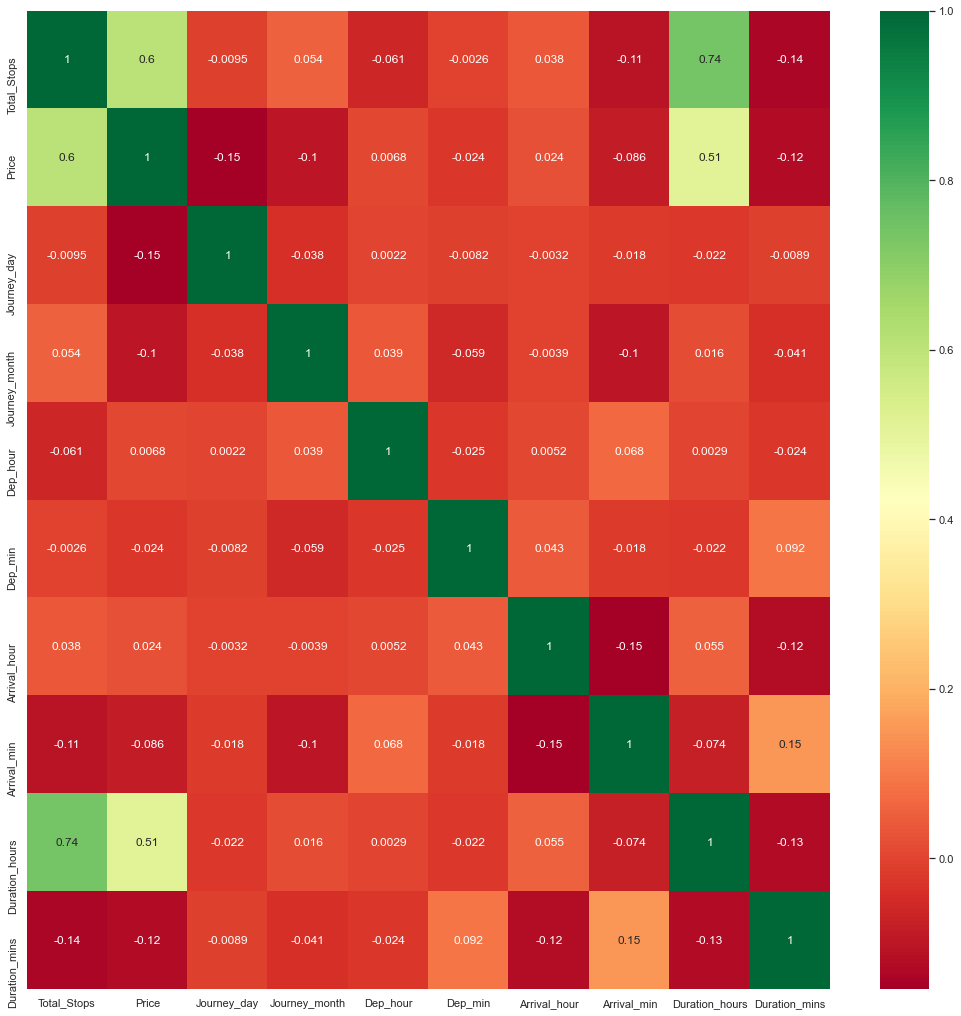

In [56]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [57]:
#In heatmap if two independent features are highly corelated(say 80%) then we can drop one feature
#We should drop corelated features to avoid curse of dimensionality


In [58]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
#ExtraTreesRegressor helps us to find out feature importance

ExtraTreesRegressor()

In [59]:
print(selection.feature_importances_)
#What is happening in above line of code

[2.26778298e-01 1.42870772e-01 5.35573067e-02 2.41508450e-02
 2.12625803e-02 2.77783183e-02 1.98421009e-02 1.26522655e-01
 1.78320379e-02 1.04078964e-02 1.89060616e-03 1.86870551e-02
 1.36060277e-01 6.69295440e-02 1.80156290e-02 8.76513083e-04
 3.14127781e-03 1.19119429e-04 5.33043846e-03 7.66645055e-05
 4.87956731e-04 9.23121319e-03 3.31932219e-03 6.76390649e-03
 1.06019462e-02 1.56563229e-02 6.60453994e-03 4.48690829e-04
 2.47561668e-02]


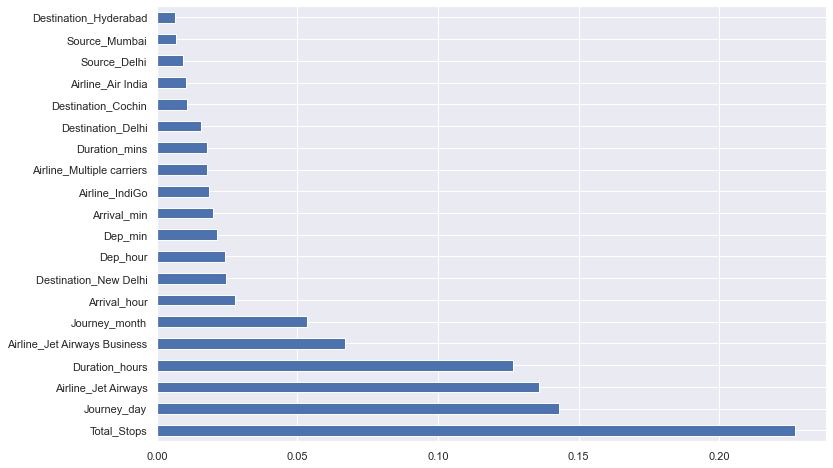

In [60]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [61]:
#Total_stops are playing the most important feature

#Fitting model using Random Forest
#Split dataset into train and test set in order to prediction w.r.t X_test
#If needed do scaling of data
#Scaling is not done in Random forest
#Import model
#Fit the data
##Predict w.r.t X_test
#In regression check RSME Score
#Plot graph

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
y_pred = reg_rf.predict(X_test)

In [65]:
reg_rf.score(X_train, y_train)

0.9529386952013323

In [66]:
reg_rf.score(X_test, y_test)

0.7974126747837879

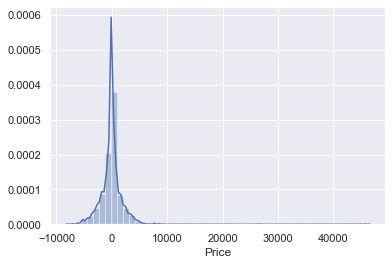

In [67]:
sns.distplot(y_test-y_pred)
plt.show()

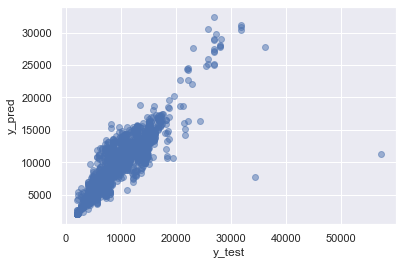

In [68]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [69]:
from sklearn import metrics

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1180.6032608658952
MSE: 4368199.316873247
RMSE: 2090.023759882468


In [71]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [72]:
metrics.r2_score(y_test, y_pred)

0.7974126747837879

In [73]:
#Hyperparameter Tuning
#Choose following method for hyperparameter tuning
#RandomizedSearchCV --> Fast
#GridSearchCV
#Assign hyperparameters in form of dictionery
#Fit the model
#Check best paramters and best score

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [76]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [77]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
prediction = rf_random.predict(X_test)

In [ ]:

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()


In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
#Save the model to reuse it again

In [80]:

import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [ ]:
model = open('flight_price_rf.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_prediction)